In [0]:
#algorithmic trading (Dual Moving avg crossover)

In [0]:
#import libs 
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [9]:
#load stock data 
from google.colab import files 
upload = files.upload()


Saving AAPL.csv to AAPL.csv


In [12]:
#store data in df 
AAPL = pd.read_csv('AAPL.csv')
#show df 
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-17,36.385715,36.597141,35.387142,36.317142,31.439657,190708700
1,2010-05-18,36.711430,36.935715,35.751427,36.051430,31.209614,195669600
2,2010-05-19,35.642857,36.131428,34.978573,35.477142,30.712471,256431700
3,2010-05-20,34.554287,34.835712,33.744286,33.965714,29.404034,320728800
4,2010-05-21,33.259998,34.928570,33.049999,34.617142,29.967972,305972800
...,...,...,...,...,...,...,...
2513,2020-05-11,308.100006,317.049988,307.239990,315.010010,315.010010,36486600
2514,2020-05-12,317.829987,319.690002,310.910004,311.410004,311.410004,40575300
2515,2020-05-13,312.149994,315.950012,303.209991,307.649994,307.649994,50155600
2516,2020-05-14,304.510010,309.790009,301.529999,309.540009,309.540009,39732300


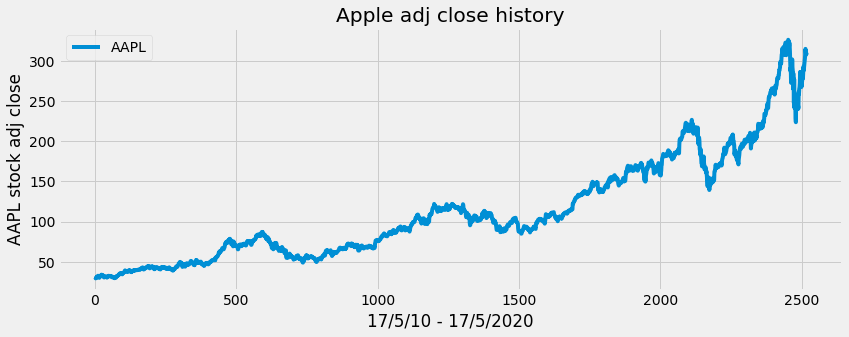

In [13]:
#visualise data 
#figure size from data
plt.figure(figsize=(12.5,4.5))
#plotting var
plt.plot(AAPL['Adj Close'], label = 'AAPL')
#title
plt.title('Apple adj close history')
#xlabel
plt.xlabel('17/5/10 - 17/5/2020')
#ylabel 
plt.ylabel('AAPL stock adj close')
#legend
plt.legend(loc = 'upper left')
#show
plt.show()

In [14]:
#moving avg with 30 day window 
SMA30 = pd.DataFrame()
#setting the SMA30 to the same value of APPL[Adj Close]
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2513,277.256215
2514,279.165812
2515,280.967362
2516,283.276708


In [15]:
#Create a df with 100day moving avg 
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2513,288.187204
2514,288.511395
2515,288.804652
2516,289.114024


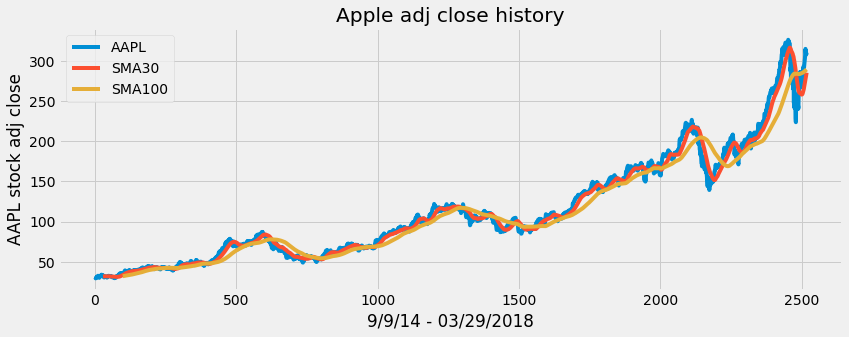

In [16]:
#visualise SMA data 
plt.figure(figsize=(12.5,4.5))
#plotting var
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
#title
plt.title('Apple adj close history')
#xlabel
plt.xlabel('9/9/14 - 03/29/2018')
#ylabel 
plt.ylabel('AAPL stock adj close')
#legend
plt.legend(loc = 'upper left')
#show
plt.show()

In [0]:
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA30'][i] > signal['SMA100'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AAPL'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA30'][i] < signal['SMA100'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AAPL'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [0]:
# df including the SMAS
signal = pd.DataFrame()
signal['AAPL'] = AAPL['Adj Close']
signal['SMA30'] = SMA30['Adj Close']
signal['SMA100'] = SMA100['Adj Close']


In [75]:
signal

,AAPL,SMA30,SMA100
0,31.439657,NaN,NaN
1,31.209614,NaN,NaN
2,30.712471,NaN,NaN
3,29.404034,NaN,NaN
4,29.967972,NaN,NaN
...,...,...,...
2513,315.010010,277.256215,288.187204
2514,311.410004,279.165812,288.511395
2515,307.649994,280.967362,288.804652
2516,309.540009,283.276708,289.114024


In [0]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] =x[1]

In [82]:
signal

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,31.439657,NaN,NaN,NaN,NaN
1,31.209614,NaN,NaN,NaN,NaN
2,30.712471,NaN,NaN,NaN,NaN
3,29.404034,NaN,NaN,NaN,NaN
4,29.967972,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2513,315.010010,277.256215,288.187204,NaN,NaN
2514,311.410004,279.165812,288.511395,NaN,NaN
2515,307.649994,280.967362,288.804652,NaN,NaN
2516,309.540009,283.276708,289.114024,NaN,NaN


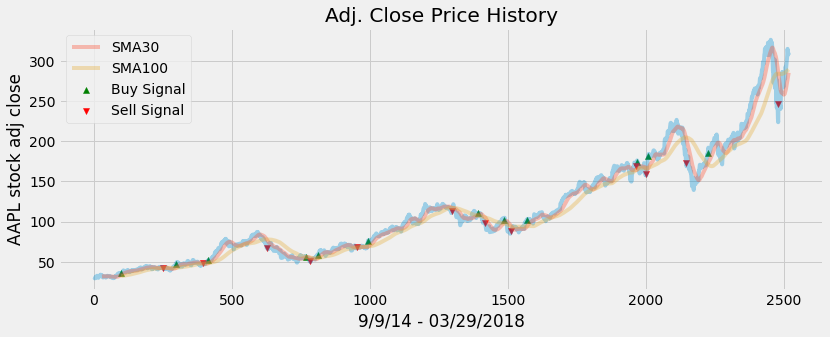

In [84]:
#visualise the buy and sell singals
#title 
title = 'Adj. Close Price History'
#stocks
myStocks = signal
ticker = 'AAPL'
#graph 
plt.figure(figsize=(12.2,4.5))#width & height
plt.scatter(myStocks.index, myStocks['Buy_Signal_Price'],color = 'green',
             label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(myStocks.index,myStocks['Sell_Signal_Price'],color = 'red',
             label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(myStocks[ticker], alpha = 0.35)
plt.plot(myStocks['SMA30'],label = 'SMA30', alpha = 0.35)
plt.plot(myStocks['SMA100'],label =  'SMA100', alpha = 0.35)
plt.title(title)
#xlabel
plt.xlabel('9/9/14 - 03/29/2018')
#ylabel 
plt.ylabel('AAPL stock adj close')
#legend
plt.legend(loc = 'upper left')
#show
plt.show()
       